1. Title: Boston Housing Data

2. Relevant Information:

   Concerns housing values in suburbs of Boston.

3. Number of Instances: 506

4. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

5. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
housing=pd.read_csv(r'C:\Users\Nirmal\ML Project 1\data.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Nirmal\\ML Project 1\\data.csv'

In [119]:
housing.reset_index(drop=True,inplace=True)

In [120]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Data Analysis and Visualzation

In [121]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         501 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [122]:
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We can see that RM contains 5 null values. Let's create a dataframe containing null values.

In [123]:
housing[housing.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [124]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Visualization for each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019846299288>,
      dtype=object)

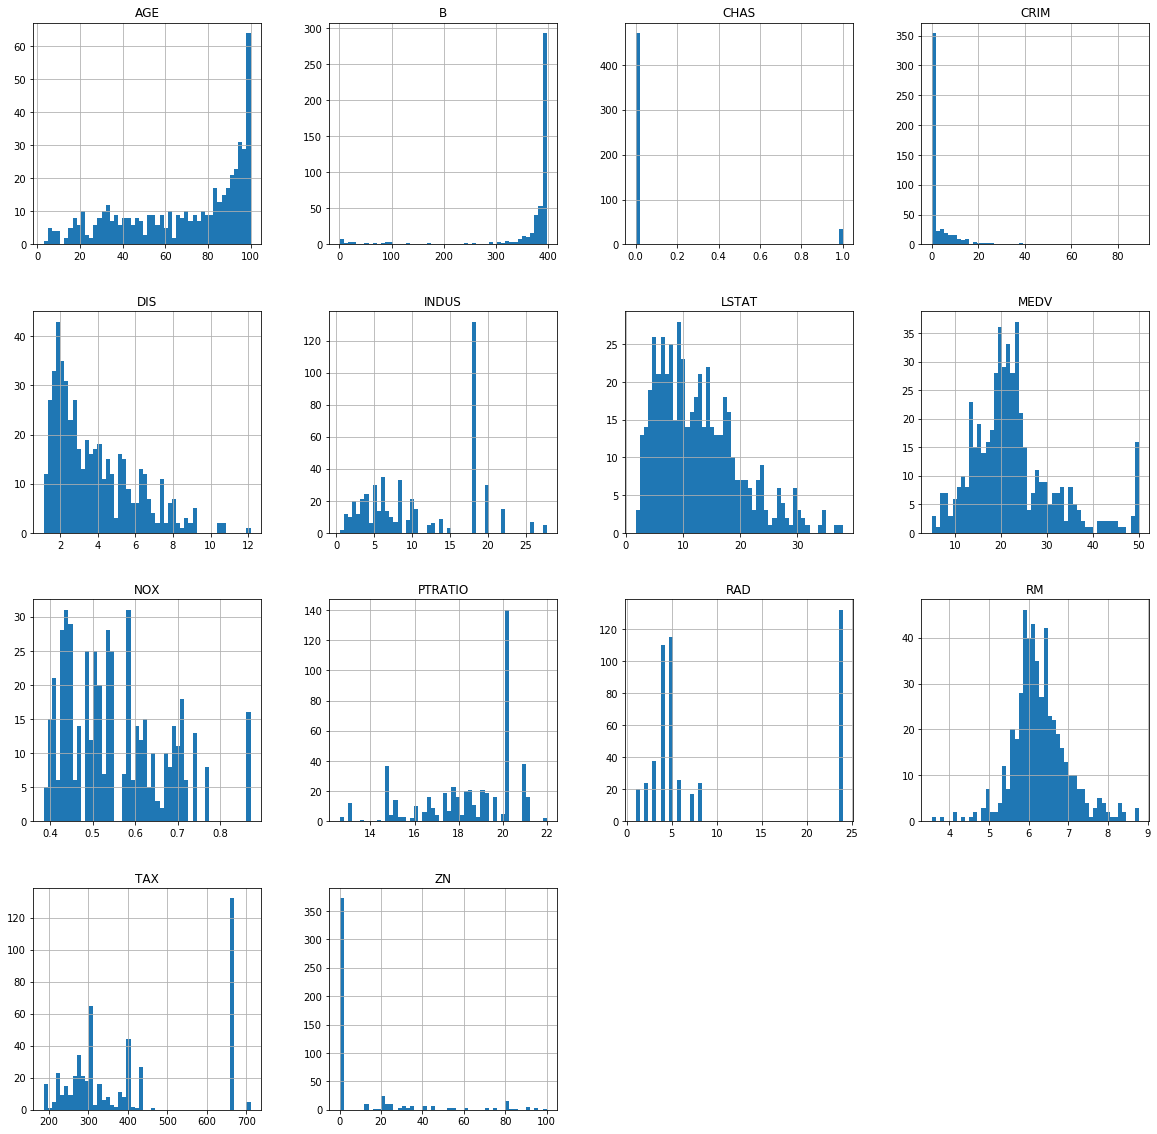

In [125]:
%matplotlib inline
housing.hist(bins=50,figsize=(20,20))

In [126]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Let's check the correalations between the columns.

Creating a heatmap

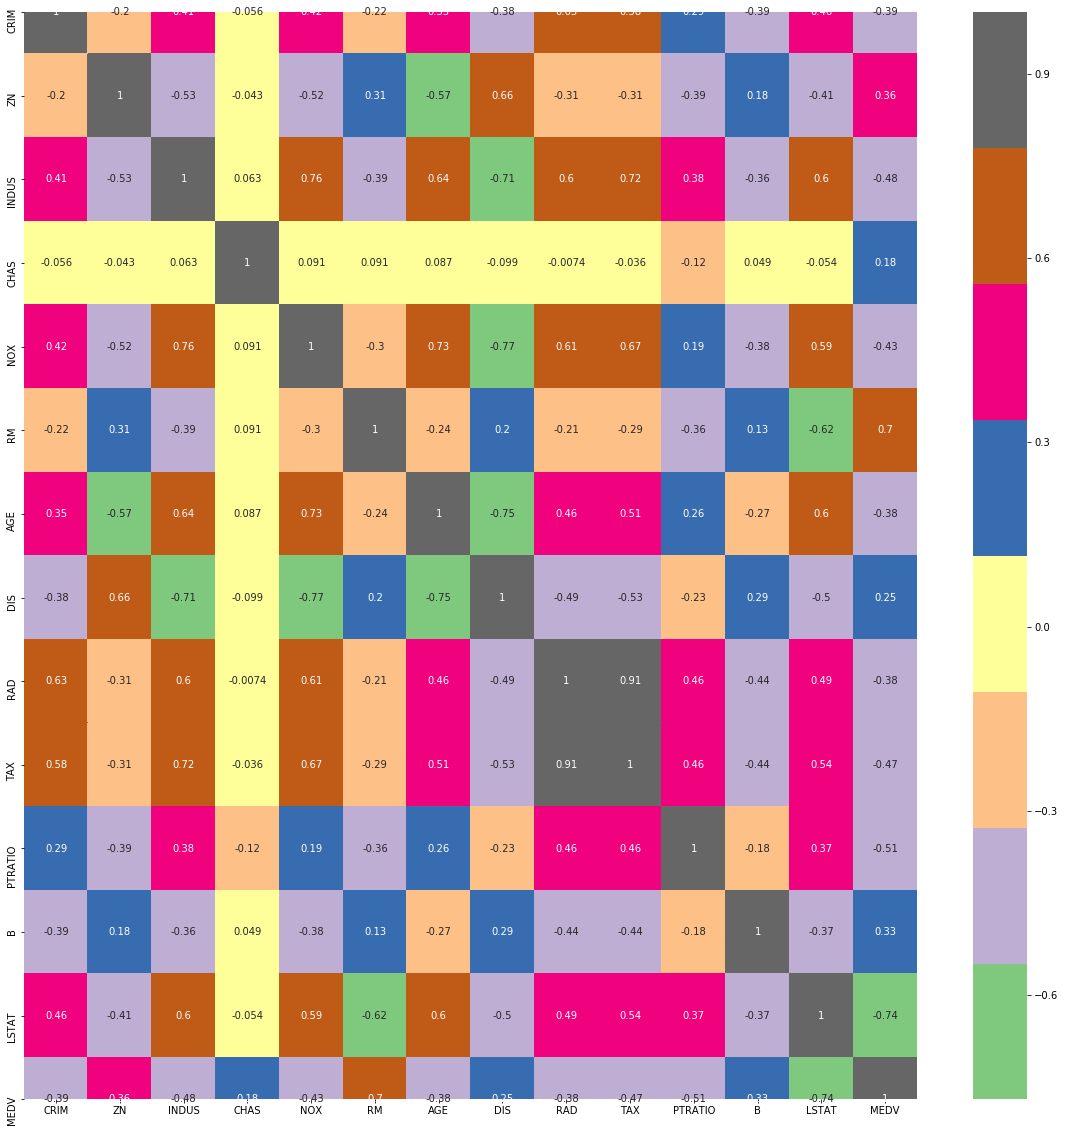

In [127]:
cormatrix=housing.corr()
cor_features=cormatrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(housing[cor_features].corr(),annot=True,cmap="Accent")

Let's find out the correlations of independent variables with the dependent variable (MEDV column)

In [128]:
cormatrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

C:\Users\Nirmal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


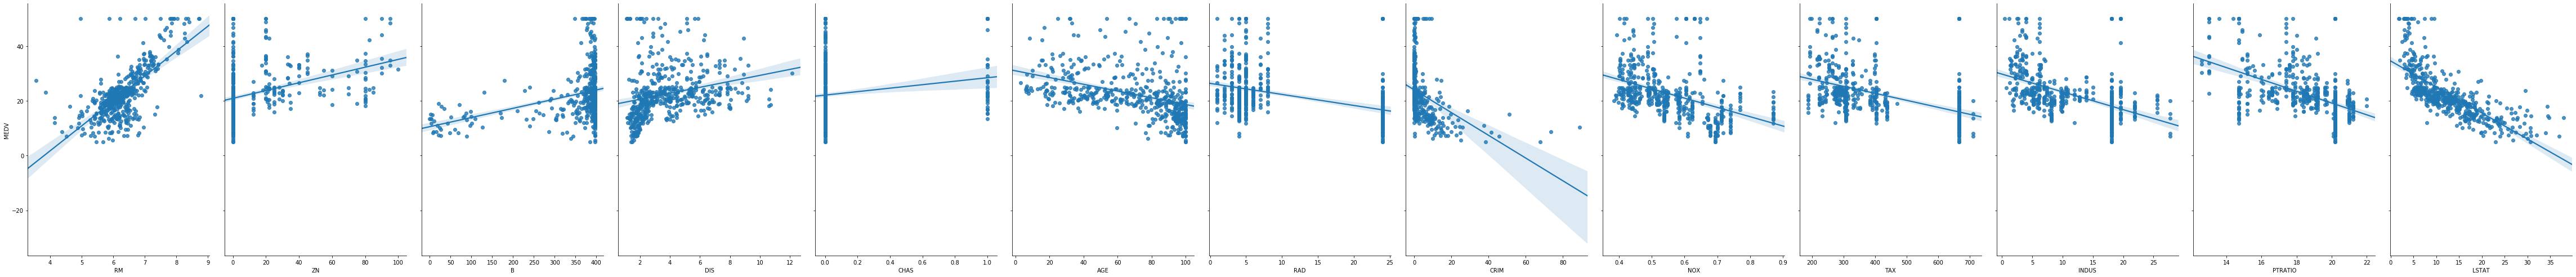

In [129]:
sns.pairplot(housing,x_vars=['RM','ZN','B','DIS','CHAS','AGE','RAD','CRIM','NOX','TAX','INDUS','PTRATIO','LSTAT'],y_vars=['MEDV'],size=7,aspect=0.7, kind='reg')

We can see high correlations between RM and MEDV is high positive correlation and contains a few outliers too.

### Handling null values

In [130]:
housing[housing.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
10,0.22489,12.5,7.87,0,0.524,NaN,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
35,0.06417,0.0,5.96,0,0.499,NaN,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
63,0.12650,25.0,5.13,0,0.453,NaN,43.4,7.9809,8,284,19.7,395.58,9.50,25.0
96,0.11504,0.0,2.89,0,0.445,NaN,69.6,3.4952,2,276,18.0,391.83,11.34,21.4
135,0.55778,0.0,21.89,0,0.624,NaN,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


We can see that the column RM which indicates the average number of rooms per dwelling has 5 nan values.

In [131]:
## range of column RM
housing.RM.max() , housing.RM.min()

(8.78, 3.5610000000000004)

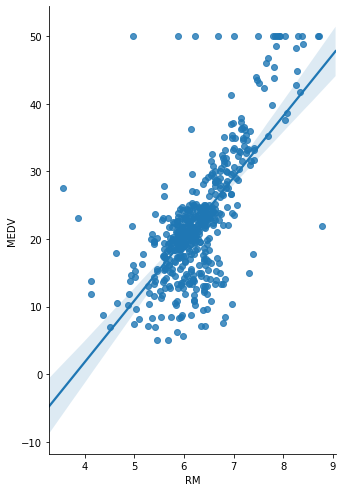

In [132]:
sns.pairplot(housing,x_vars='RM',y_vars='MEDV',kind='reg',size=7,aspect=0.7)

As we can see RM conatains a few ouliers also. Hence to fill the nan values, Median will be best suited

In [133]:
median=housing['RM'].median()
median


6.207999999999999

In [134]:
housing['RM'].fillna(median,inplace=True)


housing.isnull().sum()



CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Train_Test Split

In [135]:
X = housing.iloc[:,:-1].values

y = housing.iloc[:,-1:].values


In [136]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [137]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

We need to use stratifiedshuffle split on CHAS clumn to ensure evevn distribution of both the values in train set

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]

In [139]:
X_train

array([[4.81900e-02, 8.00000e+01, 3.64000e+00, ..., 1.64000e+01,
        3.92890e+02, 6.57000e+00],
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [4.87141e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96210e+02, 1.86800e+01],
       ...,
       [8.18700e-02, 0.00000e+00, 2.89000e+00, ..., 1.80000e+01,
        3.93530e+02, 3.57000e+00],
       [4.75237e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        5.09200e+01, 1.81300e+01],
       [4.56000e-02, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.92800e+02, 1.35100e+01]])

In [149]:
## checking no. of CHAS columns
training_setx=pd.DataFrame(data=X_train)
training_setx

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [150]:
training_set[3].value_counts()

0.0    376
1.0     28
Name: 3, dtype: int64

In [151]:
training_sety=pd.DataFrame(data=y_train)
training_sety

,0
0,21.9
1,24.5
2,16.7
3,23.1
4,23.0
...,...
399,15.6
400,13.4
401,43.8
402,14.1


We can see that the training_set (X_train) has CHAS column evenly distributed.

In [ ]:
X_train.shape

In [77]:
X_test

array([[2.49800e-02, 0.00000e+00, 1.89000e+00, ..., 1.59000e+01,
        3.89960e+02, 8.65000e+00],
       [1.78667e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.93740e+02, 2.17800e+01],
       [6.14700e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.96900e+02, 7.60000e+00],
       ...,
       [5.36000e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.96900e+02, 5.28000e+00],
       [7.16500e-02, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
        3.77670e+02, 1.42700e+01],
       [1.10690e-01, 0.00000e+00, 1.38900e+01, ..., 1.64000e+01,
        3.96900e+02, 1.79200e+01]])

In [78]:
X_test.shape

(102, 13)

## Using Linear Regression 

In [147]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
y_pred=lr.predict(X_test)
len(y_pred)

102

In [169]:
len(y_test)

102

In [179]:
mse=np.mean((y_pred-y_test)**2)
print(mse)

17.171756461904046


In [181]:
rmse=np.sqrt(mse)
print(rmse)

4.143881810803012
